In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [43]:
save_path =  "/rds/general/user/ealjibur/projects/lms-merkenshlager-analysis/live/Ediem/Teresa/"

barcodes=[]
for i in range(1,7):
    virus_name = "Virus"+str(i)
    curr = pd.read_csv(save_path+virus_name+".csv")
    curr["virus_id"] = virus_name
    curr["batch_id"] = np.floor((i+1)/2)
    curr["bio_replicate"] = (i%2)
    barcodes.append(curr.copy())

barcodes = pd.concat(barcodes)
barcodes["both_replicates"] = barcodes.Barcodes_R1.isna()|barcodes.Barcodes_R2.isna()

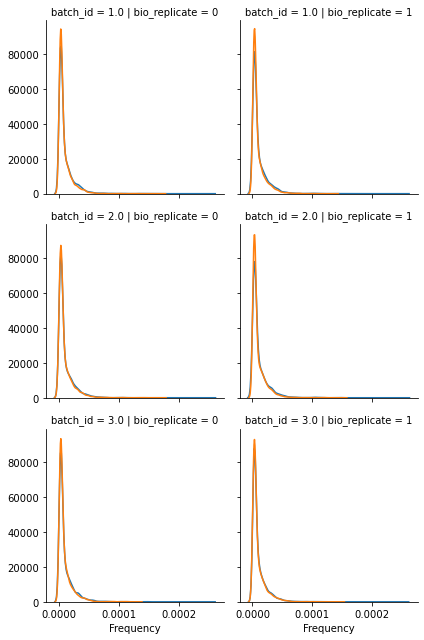

In [44]:
g = sns.FacetGrid(barcodes, row="batch_id", col="bio_replicate",hue= "both_replicates")
g.map(sns.kdeplot, "Frequency")

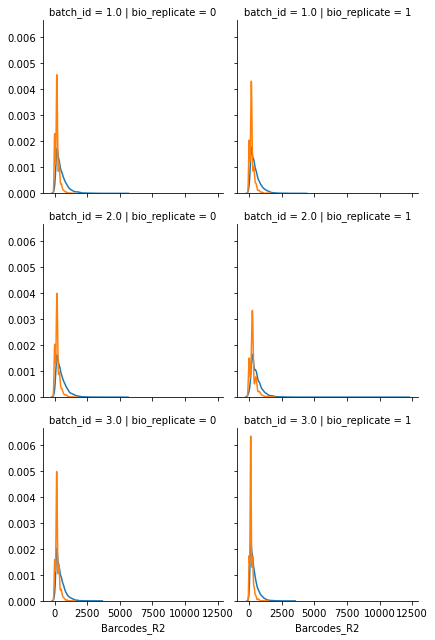

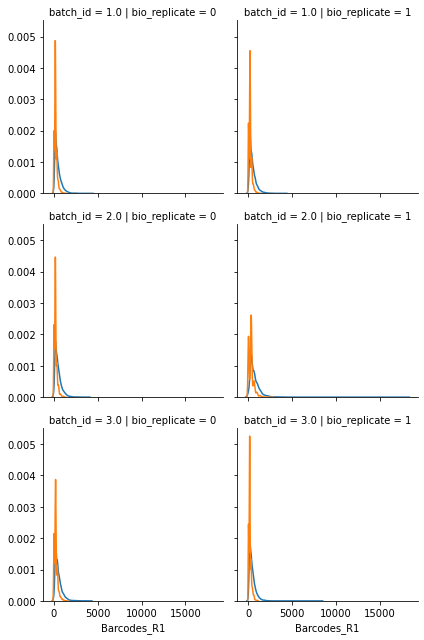

In [45]:
g = sns.FacetGrid(barcodes, row="batch_id", col="bio_replicate",hue= "both_replicates")
g.map(sns.kdeplot, "Barcodes_R2")
plt.show()
g = sns.FacetGrid(barcodes, row="batch_id", col="bio_replicate",hue= "both_replicates")
g.map(sns.kdeplot, "Barcodes_R1")

In [75]:
grouped_obj = barcodes.groupby(["both_replicates","batch_id","Sequence"], as_index=False).mean()
grouped_obj.batch_id[grouped_obj.both_replicates & (grouped_obj.bio_replicate==0.5) ].value_counts()

1.0    163
3.0    125
2.0    103
Name: batch_id, dtype: int64